# 추가 분석 - 어떤 사람이 승선하고 있었는가?

In [7]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [3]:
all_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot: >

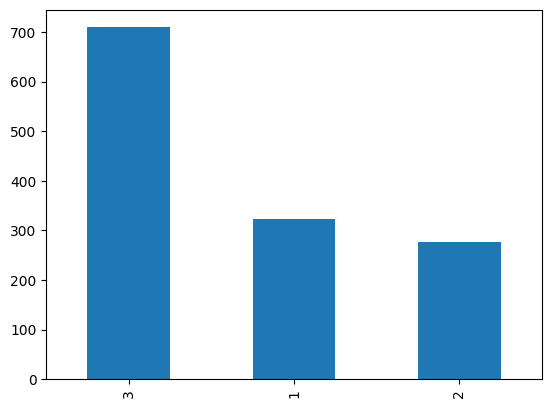

In [4]:
#티켓 등급별 인원수
all_df.Pclass.value_counts().plot.bar()

In [5]:
#요금 분포 확인
all_df[["Pclass","Fare"]].groupby("Pclass").describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

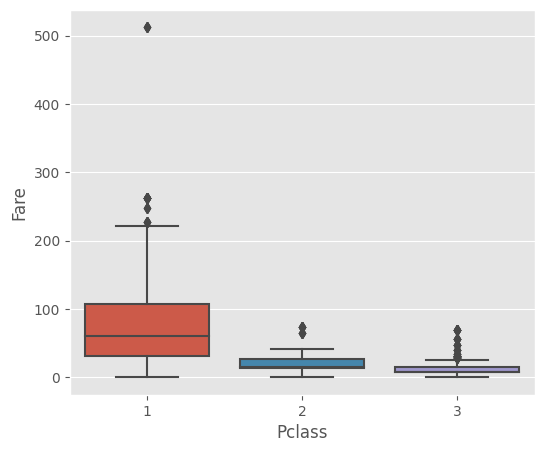

In [8]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass",y="Fare", data=all_df)

In [9]:
#1등급 티켓 중 상위 25%
all_df["Pclass2"] = all_df["Pclass"]

In [10]:
all_df.loc[all_df["Fare"]>108, "Pclass2"] = 0

In [11]:
all_df[all_df["Pclass2"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0


In [12]:
all_df[["Pclass2","Age"]].groupby("Pclass2").describe()

Age                                                     
         count       mean        std   min   25%   50%    75%   max
Pclass2                                                            
0         76.0  35.242368  15.422162  0.92  24.0  35.0  45.50  67.0
1        208.0  40.591346  13.981486  4.00  30.0  40.5  50.25  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.00  74.0

<AxesSubplot: xlabel='Pclass2', ylabel='Age'>

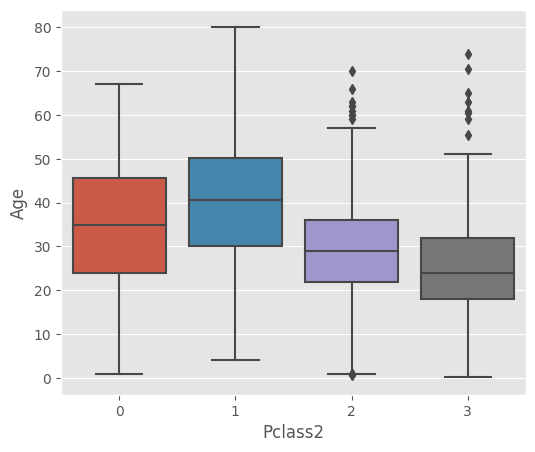

In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2",y="Age",data=all_df)

In [14]:
#15세 이상을 대상으로 분석
all_df[all_df["Age"]>15][["Pclass2","Age"]].groupby("Pclass2").describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Pclass2                                                           
0         69.0  37.920290  13.428357  17.0  27.0  36.0  48.0  67.0
1        207.0  40.768116  13.780416  16.0  30.0  41.0  50.5  80.0
2        233.0  32.369099  11.363367  16.0  24.0  30.0  39.0  70.0
3        422.0  28.200237   9.634512  16.0  21.0  26.0  33.0  74.0

<AxesSubplot: xlabel='Pclass2', ylabel='Age'>

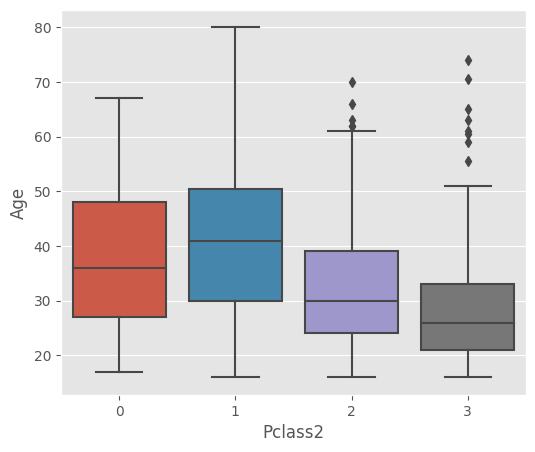

In [15]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2",y="Age",data=all_df[all_df["Age"]>15])

<AxesSubplot: xlabel='Age', ylabel='Fare'>

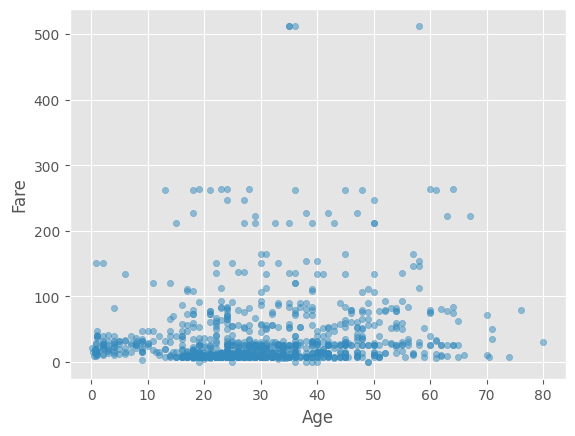

In [16]:
#연령과 티켓 요금의 분포 확인
all_df.plot.scatter(x="Age",y="Fare", alpha = 0.5)

In [17]:
#티켓 등급별 승선 가족 수 확인하기
all_df["family_num"] = all_df["SibSp"] + all_df["Parch"]

In [18]:
all_df[["Pclass2","family_num"]].groupby("Pclass2").describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             81.0  1.543210  1.541504  0.0  0.0  1.0  2.0   5.0
1            242.0  0.553719  0.687172  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

<AxesSubplot: xlabel='Pclass2', ylabel='family_num'>

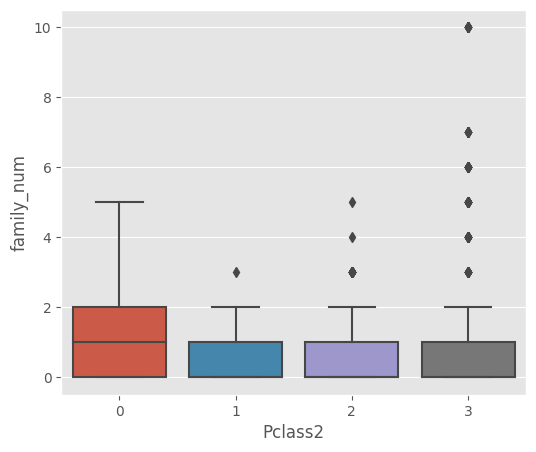

In [19]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2",y="family_num",data=all_df)
#-> 1등급 상위 25%는 평균 1.5

In [20]:
#티켓 등급별 남녀 비율 확인하기
Pclass_gender_df = all_df[["Pclass2","Sex","PassengerId"]].dropna().groupby(["Pclass2","Sex"]).count().unstack()

<AxesSubplot: xlabel='Pclass2'>

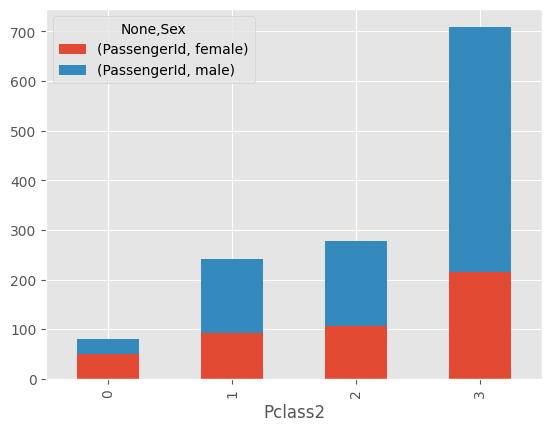

In [21]:
Pclass_gender_df.plot.bar(stacked=True)

In [23]:
Pclass_gender_df["male_ratio"] = Pclass_gender_df["PassengerId","male"] / (Pclass_gender_df["PassengerId","male"] + Pclass_gender_df["PassengerId","female"])

In [25]:
Pclass_gender_df #등급별 남자 비율

PassengerId      male_ratio
Sex          female male           
Pclass2                            
0                51   30   0.370370
1                93  149   0.615702
2               106  171   0.617329
3               216  493   0.695346

In [26]:
#승선 항구별 차이
Pclass_emb_df = all_df[["Pclass2","Embarked","PassengerId"]].dropna().groupby(["Pclass2","Embarked"]).count().unstack()

<AxesSubplot: xlabel='Pclass2'>

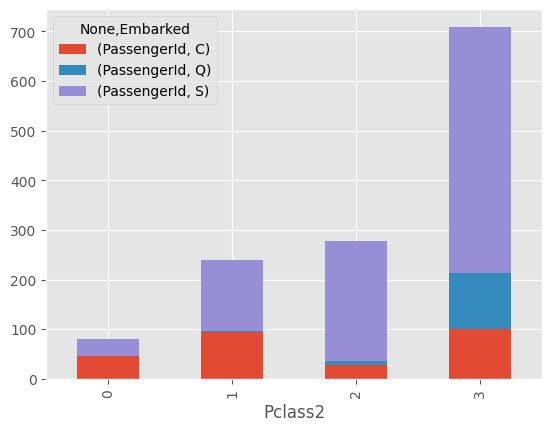

In [27]:
Pclass_emb_df = Pclass_emb_df.fillna(0)
Pclass_emb_df.plot.bar(stacked=True)

In [29]:
#누적 막대 그래프로 변환
Pclass_emb_df_ratio = Pclass_emb_df.copy()
Pclass_emb_df_ratio["sum"] = Pclass_emb_df_ratio["PassengerId","C"] + Pclass_emb_df_ratio["PassengerId","Q"] + Pclass_emb_df_ratio["PassengerId","S"]
Pclass_emb_df_ratio["PassengerId","C"] = Pclass_emb_df_ratio["PassengerId","C"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio["PassengerId","Q"] = Pclass_emb_df_ratio["PassengerId","Q"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio["PassengerId","S"] = Pclass_emb_df_ratio["PassengerId","S"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio = Pclass_emb_df_ratio.drop(["sum"], axis=1)

In [30]:
Pclass_emb_df_ratio

PassengerId                    
Embarked           C         Q         S
Pclass2                                 
0           0.580247  0.000000  0.419753
1           0.391667  0.012500  0.595833
2           0.101083  0.025271  0.873646
3           0.142454  0.159379  0.698166

<AxesSubplot: xlabel='Pclass2'>

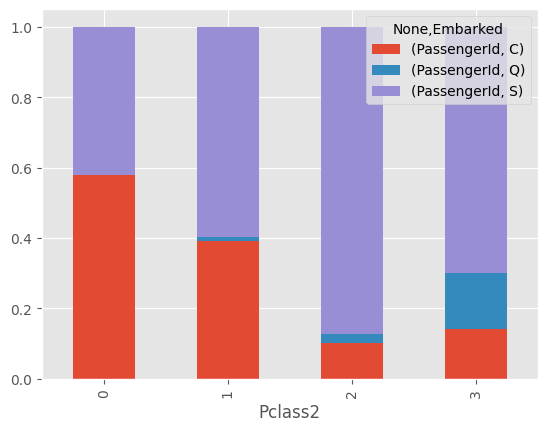

In [31]:
Pclass_emb_df_ratio.plot.bar(stacked=True)

In [32]:
#0등급 : 동반자가 많고 남성 비율이 다른 티켓 등급보다 낮다. 연령대가 약간 높다. C에서 승성한 사람이 많다.
#1등급 : 다른 등급에 비해 연령대가 가장 높다. 1인 승선률이 가장 높고 대가족 승선은 없다.
#2등급 : 1등급과 3등급의 중간적인 경향, S에서 승성한 비율이 가장 높다.
#3등급 : 1인부터 대가족까지 다양한 인원이 승선, 다른 클래스보다 Q에서 승성한 비율이 높다.

# 추가분석2 - 특정 클러스터에 주목

In [34]:
#극단적인 경향을 보이는 특정 집단 파악
#C에서 혼자 탑승한 젊은 승객 추가 분석
C_young10 = all_df[(all_df["Embarked"]=="C")& (all_df["Age"]//10==1)&(all_df["family_num"]==0)]
C_young20 = all_df[(all_df["Embarked"]=="C")& (all_df["Age"]//10==2)&(all_df["family_num"]==0)]

In [35]:
len(C_young10)

7

In [36]:
len(C_young20)

31

<AxesSubplot: xlabel='Age', ylabel='Fare'>

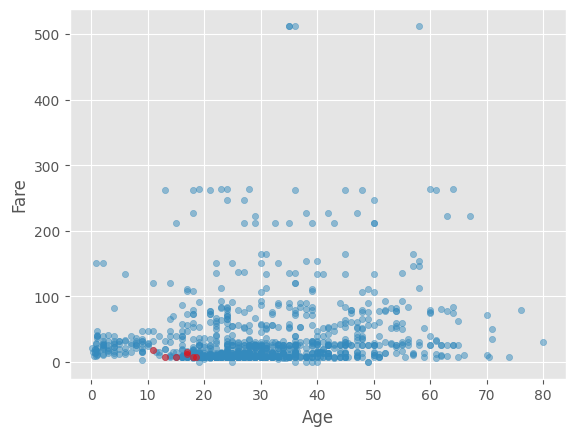

In [37]:
#C에서 탑승한 젊은 승객의 요금 분포
ax=all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young10.plot.scatter(x="Age",y="Fare", color="red", alpha=0.5, ax=ax)

<AxesSubplot: xlabel='Age', ylabel='Fare'>

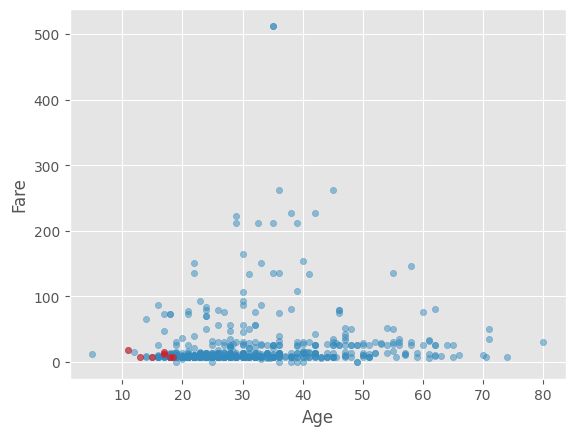

In [38]:
#홀로 승선한 모든 승객 중 C에서 승선한 승객 분포
ax =all_df[all_df["family_num"]==0].plot.scatter(x="Age",y="Fare",alpha=0.5)
C_young10.plot.scatter(x="Age",y="Fare",color="red",alpha=0.5, ax=ax)

<AxesSubplot: xlabel='Age', ylabel='Fare'>

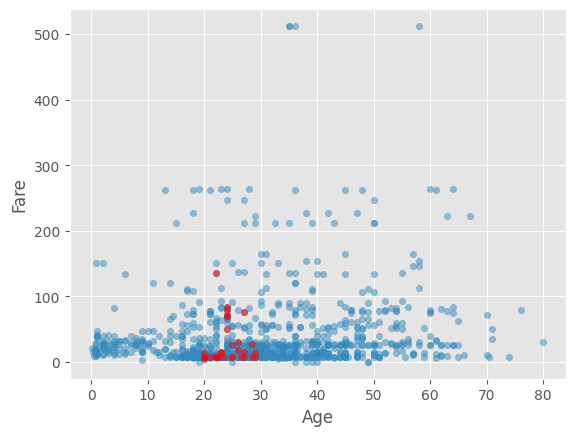

In [39]:
#C에서 홀로 승선한 20대 승객 분포
ax =all_df.plot.scatter(x="Age",y="Fare",alpha=0.5)
C_young20.plot.scatter(x="Age",y="Fare",color="red",alpha=0.5, ax=ax)

<AxesSubplot: xlabel='Age', ylabel='Fare'>

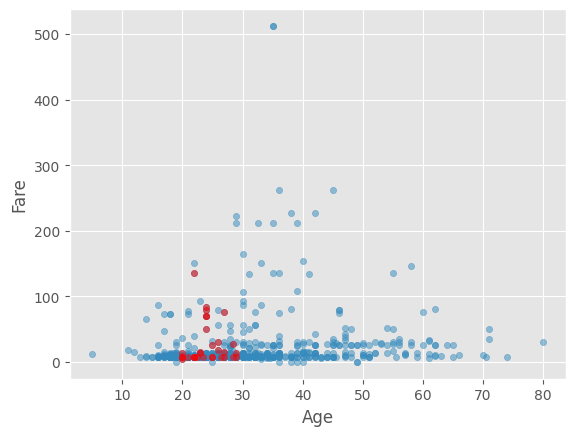

In [41]:
ax =all_df[all_df["family_num"]==0].plot.scatter(x="Age",y="Fare",alpha=0.5)
C_young20.plot.scatter(x="Age",y="Fare",color="red",alpha=0.5, ax=ax)

<AxesSubplot: xlabel='Age', ylabel='Fare'>

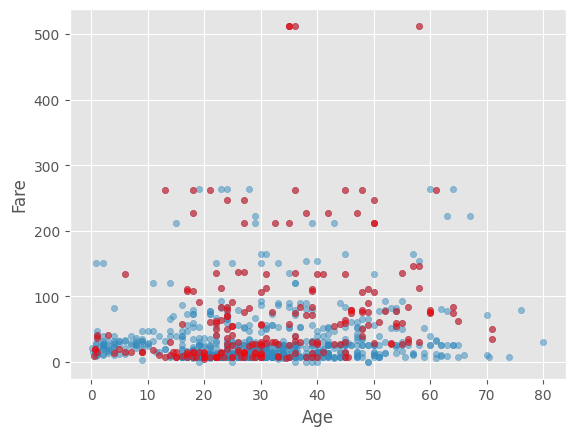

In [42]:
#10대에는 C 승객이 전체 대비 저렴한 티켓 요금으로 승성한 경우가 많다.

#C 승객을 전체 중에서 표시하기
C_all = all_df[(all_df["Embarked"]=="C")]
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_all.plot.scatter(x="Age",y="Fare", color = "red", alpha = 0.5, ax=ax)

In [43]:
#홀로 승성한 10대 승객의 항구별 평균 요금 비교
all_df[(all_df["Age"]//10 ==1) & (all_df["family_num"]==0)][["Embarked","Fare"]].groupby("Embarked").mean()

,Fare
Embarked,
C,10.594057
Q,7.531944
S,16.218712


# 결과
추가 분석 1에서는 C에서 승성한 승객은 상위 클래스 티켓을 가진 사람이 많았다.

그런데 추가 분석 2의 결과 홀로 탑승한 10대 승객만 대상으로 C보다 S에서 승성한 승객이 평균 승선 요금보다 비싼 티켓을 구매했다.